In [7]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import csv
from csv import writer
from csv import reader
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [8]:
pd = pd.read_csv('merged_data(1).csv')

In [9]:
pd.head()

,Neighborhood,price,Year,Month,All Crimes,Violent Crimes,Housing Crimes,Drug Crimes
0,Allston,419685.0,2015,6,121,18,5,13
1,Allston,425878.0,2015,7,203,29,3,26
2,Allston,431874.0,2015,8,284,38,9,45
3,Allston,438437.0,2015,9,244,28,3,35
4,Allston,442258.0,2015,10,240,35,4,28


#pd = pd.read_csv('merged_data(1).csv')
new_df = pd.read_csv('merged_data.csv')
new_df.head()

In [10]:
with open('merged_data(1).csv', 'r') as read_obj: 
    with open('new_merged_data.csv', 'w', newline='') as write_obj:
        csv_reader = reader(read_obj)
        csv_writer = writer(write_obj)
        next(csv_reader)
        for row in csv_reader:
            if float(row[1]) > 1200000:
                row.append('very high')
            if float(row[1]) > 800000 and float(row[1]) <1200000:
                row.append('high')
            if float(row[1]) > 500000 and float(row[1]) <800000:
                row.append('medium')
            if float(row[1]) > 316178.0 and float(row[1]) <500000:
                row.append('low')
            csv_writer.writerow(row)

In [12]:
#new_df = pd.read_csv('new_merged_data.csv')
df = pd.read_csv('new_merged_data.csv')
df.columns = ["Neighborhood", "prices", "year", "month", 'total crime', 'violent crime', 
                  'housing crime', 'drug crime', 'price classified']
df.head()

AttributeError: 'DataFrame' object has no attribute 'read_csv'

In [3]:
medium_low = new_df.loc[new_df['price classified'] != 'very high']
medium_low = medium_low.loc[medium_low['price classified'] != 'low']
medium_low = medium_low.dropna()
#low_high_price1 = low_high_price.loc[low_high_price['Price Classified'] != nan]

print(medium_low['price classified'].unique())
new_df.to_csv('Counts by Type.csv')

['medium' 'high']


In [33]:
len(new_df)

1630

In [4]:
new_df.isnull().sum()
new_df['Neighborhood'].fillna(new_df['Neighborhood'].mode()[0], inplace = True)
new_df['prices'].fillna(new_df['prices'].mode()[0], inplace = True)
new_df['year'].fillna(new_df['year'].mode()[0], inplace = True)
new_df['month'].fillna(new_df['month'].mode()[0], inplace = True)
new_df['total crime'].fillna(new_df['total crime'].mode()[0], inplace = True)
new_df['violent crime'].fillna(new_df['violent crime'].mode()[0], inplace = True)
new_df['housing crime'].fillna(new_df['housing crime'].mode()[0], inplace = True)
new_df['drug crime'].fillna(new_df['drug crime'].mode()[0], inplace = True)
new_df['price classified'].fillna(new_df['price classified'].mode()[0], inplace = True)
new_df.isnull().sum

<bound method DataFrame.sum of       Neighborhood  prices   year  month  total crime  violent crime  \
0            False   False  False  False        False          False   
1            False   False  False  False        False          False   
2            False   False  False  False        False          False   
3            False   False  False  False        False          False   
4            False   False  False  False        False          False   
...            ...     ...    ...    ...          ...            ...   
1625         False   False  False  False        False          False   
1626         False   False  False  False        False          False   
1627         False   False  False  False        False          False   
1628         False   False  False  False        False          False   
1629         False   False  False  False        False          False   

      housing crime  drug crime  price classified  
0             False       False             False  


In [5]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
new_df['price classified'] = lb_make.fit_transform(new_df['price classified'])

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [7]:
label = new_df['price classified']
features = new_df[['violent crime', 'housing crime', 'drug crime', 'total crime']]

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(features, label)

importances = pd.DataFrame(data={

    'Attribute': features.columns,

    'Importance': logreg.coef_[0]

})

importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

plt.title('Feature importances obtained from coefficients', size=20)

plt.xticks(rotation='vertical')

plt.show()

In [9]:
model = ExtraTreesClassifier()
model.fit(features,label)

ExtraTreesClassifier()

[0.28556134 0.15516239 0.21821263 0.34106365]


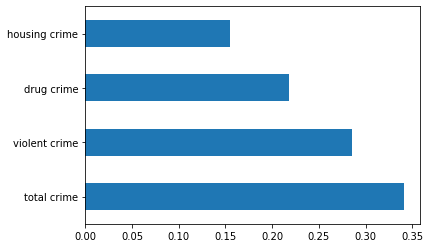

In [10]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

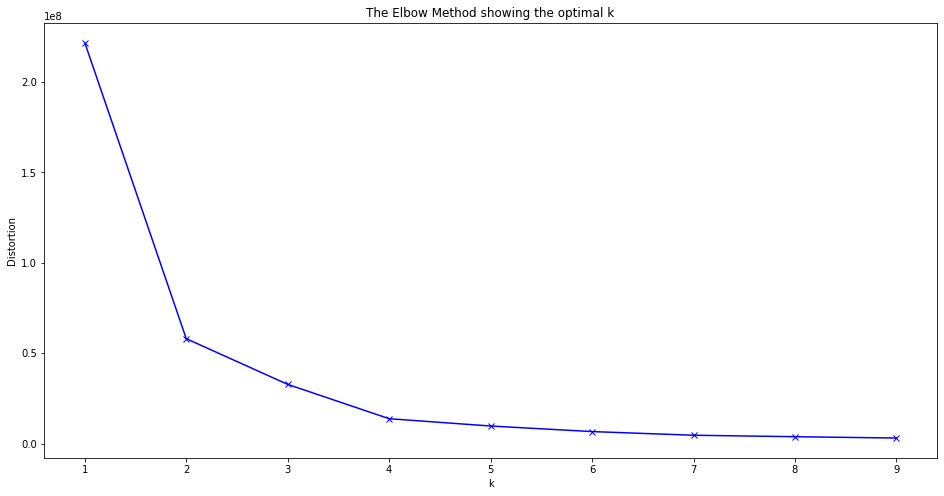

In [11]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

In [13]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, label, test_size=0.2)

In [1]:
knn = KNeighborsClassifier(n_neighbors=4)
model = knn.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test2)
accuracy = model.score(X_test, y_test)
print(accuracy)

NameError: name 'KNeighborsClassifier' is not defined

In [15]:
confusion_matrix(y_test, y_pred)

array([[34, 21, 32,  0],
       [27,  9, 23,  0],
       [58, 30, 76,  1],
       [ 6,  2,  6,  1]])

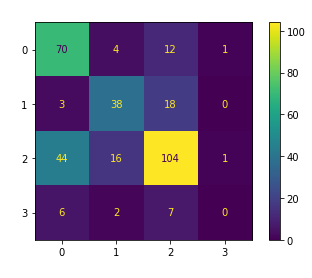

In [16]:
matrix = plot_confusion_matrix(model, X_test, y_test)
matrix.ax_.set_title('Confusion Matrix', color = 'white')
plt.xlabel('Predicted Label', color = 'white')
plt.ylabel('True Label', color = 'white')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.39      0.32        87
           1       0.15      0.15      0.15        59
           2       0.55      0.46      0.50       165
           3       0.50      0.07      0.12        15

    accuracy                           0.37       326
   macro avg       0.37      0.27      0.27       326
weighted avg       0.40      0.37      0.37       326



In [34]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.6441717791411042


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.80      0.67        87
         1.0       0.68      0.51      0.58        59
         2.0       0.69      0.67      0.68       165
         3.0       0.00      0.00      0.00        15

    accuracy                           0.64       326
   macro avg       0.49      0.49      0.48       326
weighted avg       0.63      0.64      0.63       326



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

[0.53451734 0.10414689 0.14212371 0.21921207]


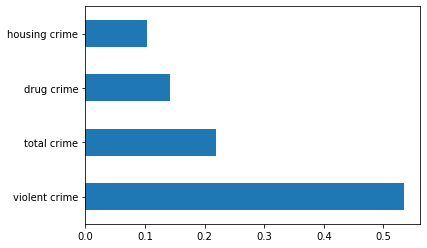

In [37]:
print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=features.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

Random Forest

In [20]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
Y_pred_rf = forest_model.predict(X_test)
accuracy = forest_model.score(X_test, y_test)
print(accuracy)

0.7239263803680982


[0.2994671  0.14170381 0.20234008 0.356489  ]


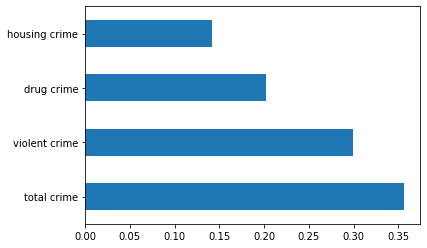

In [38]:
print(forest_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(forest_model.feature_importances_, index=features.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

In [21]:
confusion_matrix(y_test, Y_pred_rf)

array([[ 65,   4,  17,   1],
       [  2,  37,  19,   1],
       [ 22,  10, 132,   1],
       [  4,   1,   8,   2]])

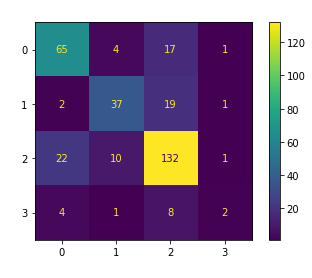

In [22]:
matrix = plot_confusion_matrix(forest_model, X_test, y_test)
matrix.ax_.set_title('Confusion Matrix', color = 'white')
plt.xlabel('Predicted Label', color = 'white')
plt.ylabel('True Label', color = 'white')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')

In [23]:
print(classification_report(y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        87
           1       0.71      0.63      0.67        59
           2       0.75      0.80      0.77       165
           3       0.40      0.13      0.20        15

    accuracy                           0.72       326
   macro avg       0.64      0.58      0.59       326
weighted avg       0.71      0.72      0.71       326



Neural network

In [24]:
from keras.models import Sequential 
from keras.layers import Dense
import tensorflow as tf
tf.convert_to_tensor(y_train, np.float)
tf.convert_to_tensor(X_train, np.float)
X_train=np.asarray(X_train).astype(np.float32)
X_test=np.asarray(X_test).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [25]:
from keras.models import Sequential 
from keras.layers import Dense
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=300, batch_size =30)

Epoch 1/300
44/44 [==============================] - 11s 886us/step - loss: 0.0000e+00 - accuracy: 0.2006
Epoch 2/300
44/44 [==============================] - 0s 946us/step - loss: 0.0000e+00 - accuracy: 0.2112
Epoch 3/300
44/44 [==============================] - 0s 802us/step - loss: 0.0000e+00 - accuracy: 0.2126
Epoch 4/300
44/44 [==============================] - 0s 717us/step - loss: 0.0000e+00 - accuracy: 0.2059
Epoch 5/300
44/44 [==============================] - 0s 736us/step - loss: 0.0000e+00 - accuracy: 0.1960
Epoch 6/300
44/44 [==============================] - 0s 720us/step - loss: 0.0000e+00 - accuracy: 0.2047
Epoch 7/300
44/44 [==============================] - 0s 721us/step - loss: 0.0000e+00 - accuracy: 0.2159
Epoch 8/300
44/44 [==============================] - 0s 716us/step - loss: 0.0000e+00 - accuracy: 0.2023
Epoch 9/300
44/44 [==============================] - 0s 709us/step - loss: 0.0000e+00 - accuracy: 0.2016
Epoch 10/300
44/44 [==============================] - 

44/44 [==============================] - 0s 649us/step - loss: 0.0000e+00 - accuracy: 0.2170
Epoch 155/300
44/44 [==============================] - 0s 682us/step - loss: 0.0000e+00 - accuracy: 0.2119
Epoch 156/300
44/44 [==============================] - 0s 667us/step - loss: 0.0000e+00 - accuracy: 0.2087
Epoch 157/300
44/44 [==============================] - 0s 676us/step - loss: 0.0000e+00 - accuracy: 0.2144
Epoch 158/300
44/44 [==============================] - 0s 675us/step - loss: 0.0000e+00 - accuracy: 0.2086
Epoch 159/300
44/44 [==============================] - 0s 662us/step - loss: 0.0000e+00 - accuracy: 0.2139
Epoch 160/300
44/44 [==============================] - 0s 656us/step - loss: 0.0000e+00 - accuracy: 0.2283
Epoch 161/300
44/44 [==============================] - 0s 670us/step - loss: 0.0000e+00 - accuracy: 0.2198
Epoch 162/300
44/44 [==============================] - 0s 666us/step - loss: 0.0000e+00 - accuracy: 0.1898
Epoch 163/300
44/44 [==============================

In [28]:
Y_pred_nn = model.predict(X_test)

In [29]:
print(classification_report(y_test, Y_pred_nn))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        87
         1.0       0.18      1.00      0.31        59
         2.0       0.00      0.00      0.00       165
         3.0       0.00      0.00      0.00        15

    accuracy                           0.18       326
   macro avg       0.05      0.25      0.08       326
weighted avg       0.03      0.18      0.06       326



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [30]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.57


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print(logreg.coef_, logreg.intercept_)

[[-0.00126441  0.02877246  0.04155231 -0.00477702]
 [ 0.03929077 -0.07427216 -0.05140218  0.00475261]
 [-0.02214167 -0.06403253 -0.07156688  0.01212402]
 [-0.01588469  0.10953224  0.08141675 -0.01209961]] [ 0.44621477 -0.59128975  0.56758723 -0.42251225]


Feature: 0, Score: -0.00126
Feature: 1, Score: 0.02877
Feature: 2, Score: 0.04155
Feature: 3, Score: -0.00478
[-0.00126441  0.02877246  0.04155231 -0.00477702]


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

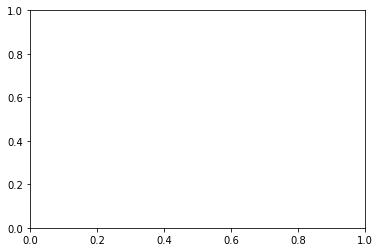

In [32]:
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], print(importance))
pyplot.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
#Nuh add in this one!!!!!!
#This just maps all the crime to the prices
plt.scatter(new_df['prices'], new_df['total crime'])
plt.xlabel('Prices')
plt.ylabel('All Crimes')
plt.show

In [ ]:
plt.scatter(new_df['prices'], new_df['total crime'])
plt.xlabel('Prices')
plt.ylabel('violent crime')
plt.show

In [ ]:
plt.scatter(new_df['prices'], new_df['total crime'])
plt.xlabel('Prices')
plt.ylabel('drug crime')
plt.show

In [ ]:
plt.scatter(new_df['prices'], new_df['total crime'])
plt.xlabel('Prices')
plt.ylabel('housing crime')
plt.show

In [ ]:
new_df.head()

In [ ]:
new_df = pd.read_csv('new_merged_data.csv')

In [ ]:
average_price = new_df.loc[new_df['price classified'] == 'medium']

In [ ]:
x = new_df[['prices', 'total crime']]

In [ ]:
x['prices'].max()

In [ ]:
kmeans = KMeans(4)
kmeans.fit(x)

In [ ]:
clusters=x.copy()
clusters['clusters_pred']=kmeans.fit_predict(x)

In [ ]:
plt.scatter(clusters['prices'], clusters['total crime'], c=clusters['clusters_pred'], cmap='rainbow')
plt.xlabel('prices')
plt.ylabel('total crime')
plt.show()